#  Decision Tree on Complete Diamonds Price Dataset

The **Diamonds dataset** from Kaggle is a dataset containing information about the physical and pricing attributes of nearly 54,000 diamonds.

Compared to Homework 1, in this case we will consider 8,000 samples of the **complete** dataset (i.e. without excluding categorical variables).

### Key Features:
- **Carat**: The weight of the diamond.
- **Cut**: Quality of the cut.
- **Color**: Diamond colour.
- **Clarity**: The measurement of how clear the diamond is.
- **Depth**: The total depth percentage (z / mean(x, y)).
- **Table**: Width of the diamond's top as a percentage of its widest point.
- **Price**: Price in US dollars.
- **X, Y, Z**: Dimensions of the diamond in mm (length, width, depth).

This dataset is useful for exploring relationships between physical attributes and pricing, and for building predictive models to estimate diamond prices based on their features.

For more information see: https://www.kaggle.com/datasets/shivam2503/diamonds.

# Overview

In the notebook you will perform a complete pipeline of decision tree - regression task. 
First, you will:
- perform the ordinal encoding of categorical variables;
- split the data into training and test set;
- standardize the data.

You will then be asked to learn various decision tree models. 

1. Start by training a decision tree without any limitations (i.e., leaving the **default hyperparameters**).
2. Next, try to set a **different value for max_depth** hyperparameter to see what happens.
3. Then, identify the optimal max_depth through **cross-validation**.
5. Learn the decision tree with optimal max_depth found above.
6. Inspect the importance of each feature and print the name of the best ones.
7. Compare the best decision tree obtained above with a standard Linear Regressor.
 
### IMPORTANT.
- Note that in each of the above steps you will have to choose the appropriate split of the data (see the second bullet point above);
- The code should run without requiring modifications even if some best choice of parameters changes; for example, you should not pass the best value of hyperparameters "manually" (i.e., passing the values as input parameters to the models). The only exception is in the TO DO titled 'ANSWER THE FOLLOWING'
- Do not change the printing instructions (other than adding the correct variable name for your code), and do not add printing instructions!

## TO DO -- Insert your ID number ("numero di matricola") below

In [10]:
# -- put here your ID Number ("numero di matricola")
numero_di_matricola = 215196

In [11]:
# -- import some packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# -- load the data (csv format)
df = pd.read_csv('diamonds.csv', sep = ',')

# -- remove the data samples with missing values (NaN)
df = df.dropna()

# -- drop the column containing the id of the data
df = df.drop(columns=['Unnamed: 0'], axis=1)

# -- print the column names together with their data type
print(df.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [13]:
# -- print the first 5 rows of the dataframe
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.01,Ideal,G,SI2,62.1,57.0,4350,6.48,6.44,4.01
1,0.59,Ideal,E,VVS2,61.8,56.0,2515,5.39,5.42,3.34
2,1.02,Ideal,F,VVS1,62.4,56.0,9645,6.44,6.42,4.01
3,1.01,Premium,H,SI1,61.2,58.0,4642,6.47,6.43,3.95
4,0.41,Ideal,G,VS1,61.5,56.0,961,4.79,4.77,2.94


In the following cell, we convert our (pandas) dataframe into set X (containing our features) and the set Y (containing our target, i.e., the price)

In [14]:
# -- compute X and Y sets
X = df.drop(columns=['price'], axis=1)
Y = df['price']

print("Total number of samples:", X.shape[0])

# -- print the features names
features_names = list(X.columns)
print("Features names:", features_names)

X = X.values
Y = Y.values

# -- print shapes
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

Total number of samples: 8000
Features names: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
X shape:  (8000, 9)
Y shape:  (8000,)


# Data Pre-Processing

## TO DO -- ORDINAL ENCODING OF CATEGORICAL VARIABLES

Use the $\texttt{preprocessing.OrdinalEncoder}$ from scikit learn to perform ordinal encoding of the three categorical variables: **cut**, **color**, and **clarity**.

***NOTE***: Use the input parameter $\texttt{categories}$ to specify, from worst to best, the levels for each categorical variable. In detail:
- Cut: ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
- Color: ['J', 'I', 'H', 'G', 'F', 'E', 'D']
- Clarity: ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

For more information see: https://www.kaggle.com/datasets/shivam2503/diamonds.

We first print the data type of each column, returning both column name and its corresponding index in X.

In [15]:
# The sense of doing this is assign a nuemrical value to object that are represented by "fair", "good", etc. So we want to give them 
# nuemrical values like 1,2,3 etc such that we can use this datas in our machine learning algorithm



# -- print the data type of each column

for index_col, name_col in zip(range(X.shape[1]), features_names):
    print(f"Column {name_col} (index: {index_col}) -- data type: {type(X[0, index_col])}")

Column carat (index: 0) -- data type: <class 'float'>
Column cut (index: 1) -- data type: <class 'str'>
Column color (index: 2) -- data type: <class 'str'>
Column clarity (index: 3) -- data type: <class 'str'>
Column depth (index: 4) -- data type: <class 'float'>
Column table (index: 5) -- data type: <class 'float'>
Column x (index: 6) -- data type: <class 'float'>
Column y (index: 7) -- data type: <class 'float'>
Column z (index: 8) -- data type: <class 'float'>


Now let's encode the categorical variables.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

# -- TO DO
# Definire le categorie in ordine specifico
categories = [
    ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],  # Per la colonna 'cut'
    ['J', 'I', 'H', 'G', 'F', 'E', 'D'],               # Per la colonna 'color'
    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  # Per la colonna 'clarity'
]

# Inizializzare l'encoder
encoder = OrdinalEncoder(categories=categories)

# Esegui l'encoding sulle colonne categoriche
# Le colonne 'cut', 'color', e 'clarity' hanno rispettivamente indici 1, 2 e 3
X_categorical = X[:, [1, 2, 3]]  # Seleziona solo le colonne categoriche
X_encoded = encoder.fit_transform(X_categorical)

# Ora sostituiamo le colonne originali con le versioni codificate nel dataset originale
X[:, [1, 2, 3]] = X_encoded



# Stampa il risultato per verificarlo
print("Dataset con le colonne categoriche codificate:")
print(X)



# Check dell'encoding
colonne_modificate = [1, 2, 3]

# Per ogni colonna categorica, verifica la codifica
for i, col_index in enumerate(colonne_modificate):
    print(f"Verifica della colonna {col_index} ({encoder.categories_[i]}):")
    
    # Ottieni i valori unici nella colonna codificata
    unique_encoded_values = set(X[:, col_index])
    
    # Mappatura attesa
    expected_mapping = {cat: idx for idx, cat in enumerate(encoder.categories_[i])}
    
    # Conta le occorrenze di ciascun valore originale e confronta
    for original_value, encoded_value in expected_mapping.items():
        occorrenze = (X_categorical[:, i] == original_value).sum()
        print(f"  {original_value} -> {encoded_value} (Occorrenze: {occorrenze})")
    
    # Confronta i valori codificati unici nella colonna
    print(f"  Valori codificati trovati nella colonna: {unique_encoded_values}")
    print()



Dataset con le colonne categoriche codificate:
[[1.01 4.0 3.0 ... 6.48 6.44 4.01]
 [0.59 4.0 5.0 ... 5.39 5.42 3.34]
 [1.02 4.0 4.0 ... 6.44 6.42 4.01]
 ...
 [0.63 4.0 6.0 ... 5.47 5.5 3.43]
 [1.23 3.0 1.0 ... 6.95 6.88 4.17]
 [1.6 1.0 2.0 ... 7.59 7.56 4.54]]
Verifica della colonna 1 (['Fair' 'Good' 'Very Good' 'Premium' 'Ideal']):
  Fair -> 0 (Occorrenze: 242)
  Good -> 1 (Occorrenze: 723)
  Very Good -> 2 (Occorrenze: 1799)
  Premium -> 3 (Occorrenze: 2014)
  Ideal -> 4 (Occorrenze: 3222)
  Valori codificati trovati nella colonna: {0.0, 1.0, 2.0, 3.0, 4.0}

Verifica della colonna 2 (['J' 'I' 'H' 'G' 'F' 'E' 'D']):
  J -> 0 (Occorrenze: 414)
  I -> 1 (Occorrenze: 821)
  H -> 2 (Occorrenze: 1208)
  G -> 3 (Occorrenze: 1692)
  F -> 4 (Occorrenze: 1385)
  E -> 5 (Occorrenze: 1484)
  D -> 6 (Occorrenze: 996)
  Valori codificati trovati nella colonna: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0}

Verifica della colonna 3 (['I1' 'SI2' 'SI1' 'VS2' 'VS1' 'VVS2' 'VVS1' 'IF']):
  I1 -> 0 (Occorrenze: 1

In [ ]:
'''
from sklearn.preprocessing import OrdinalEncoder

# Togli gli # e definisci categories cosi oppure lascia la versione senza apici '
#categories = [
#    ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],  
#    ['J', 'I', 'H', 'G', 'F', 'E', 'D'],               
#    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  
#]

categorical_columns = [1, 2, 3] 
categories = [np.unique(X[:, col]).tolist() for col in categorical_columns]

encoder = OrdinalEncoder(categories=categories)

X_categorical = X[:, [1, 2, 3]]  
X_encoded = encoder.fit_transform(X_categorical)


X[:, [1, 2, 3]] = X_encoded
'''


Check if the encoding was done correctly.

In [17]:
# -- print the data type of each column
for index_col, name_col in zip(range(X.shape[1]), features_names):
    print(f"Column {name_col} (index: {index_col}) -- data type: {type(X[0, index_col])}")

Column carat (index: 0) -- data type: <class 'float'>
Column cut (index: 1) -- data type: <class 'float'>
Column color (index: 2) -- data type: <class 'float'>
Column clarity (index: 3) -- data type: <class 'float'>
Column depth (index: 4) -- data type: <class 'float'>
Column table (index: 5) -- data type: <class 'float'>
Column x (index: 6) -- data type: <class 'float'>
Column y (index: 7) -- data type: <class 'float'>
Column z (index: 8) -- data type: <class 'float'>


## TO DO -- SPLIT DATA INTO TRAINING AND TEST SET, WITH THE FOLLOWING PERCENTAGES: 80% AND 20%

First, compute the number of samples to be included in the training set (i.e., 80% of the data) and the number of samples to be included in the test set (i.e., 20% of the data) and print such values.

In [18]:
# -- split data into train (4/5 of samples) and test data (1/5 of samples)
m = X.shape[0] # number of features in column 0 (can be any othe colum)

m_train = int(4/5 * m)
m_test = m - m_train 

# -- TO DO
print("Amount of data for training and deciding parameters:",m_train )
print("Amount of data for test:",m_test )

Amount of data for training and deciding parameters: 6400
Amount of data for test: 1600


Next, use the $\texttt{train\_test\_split}$ function from sklearn.model_selection to split the data; in every call fix $\texttt{random\_state}$ to your numero_di_matricola. 
At the end, you should store the data in the following variables:
- X_train, Y_train: training data;
- X_test, Y_test: test data.

In [19]:
from sklearn.model_selection import train_test_split

# -- TO DO
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size= m_test , random_state= numero_di_matricola )


print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 6400
Test size: 1600


## TO DO -- DATA STANDARDIZATION

Stardardise the data using $\texttt{preprocessing.Standardscaler}$ from scikit learn.

If V is the name of the variable storing part of the data, the corresponding standardized version should be stored in V_scaled. For example, the scaled version of X_train should be stored in X_train_scaled.
 
For simplicity, with the function $\texttt{copy}$, create a copy of the variable V by calling it V_scaled and then apply the scaler to this copy.

***NOTE***: standardise only the 6 continuous variables (**carat**, **depth**, **table**, **x**, **y**, **z**) and not the 3 categorical variables just encoded.

In [20]:
# -- data standardization
from sklearn.preprocessing import StandardScaler

# -- TO DO

scaler_target = [0,4,5,6,7,8]

scaler = StandardScaler()
scaler.fit(X_train[:, scaler_target]) # fit the scaler only on the target's column

X_train_scaled = X_train.copy()
X_train_scaled[:, scaler_target] = scaler.transform(X_train_scaled[:, scaler_target]) # scale the copy X_train 


X_test_scaled = X_test.copy()
X_test_scaled[:, scaler_target] = scaler.transform(X_test_scaled[:, scaler_target]) # scale the copy of X_test


# Decision tree models

Decision trees are supervised machine learning models used for both **classification** and **regression** tasks. They are structured like a tree, where each node represents a condition on the data, each branch corresponds to a possible answer, and the leaves represent the final outcome (class or value). In this homework, you will use decision trees in a regression setting to predict the price of diamonds.

## TO DO -- DEFAULT SETTINGS

Learn a decision tree leaving the default values for the hyperparameters. Set only $\texttt{random\_state}$ to your numero_di_matricola.

In [21]:
from sklearn.tree import DecisionTreeRegressor
# -- TO DO
dt = DecisionTreeRegressor(random_state= numero_di_matricola)

dt.fit(X_train_scaled, Y_train)
training_score = dt.score(X_train_scaled, Y_train)

test_score = dt.score(X_test_scaled, Y_test)

Print the value of 1 - coefficient of determination $(R^2)$, to evaluate how well the model fits both the training and test data. 

In [22]:
print("train score", training_score)
print("test score", test_score)

print("1 - coefficient of determination on training data:", 1 - training_score )
print("1 - coefficient of determination on test data:", 1 - test_score)

train score 0.9999997098628095
test score 0.9607148767060356
1 - coefficient of determination on training data: 2.901371904950878e-07
1 - coefficient of determination on test data: 0.039285123293964386


Check what are some of the characteristics of the tree, like its depth and the number of nodes.

In detail, print:
- ***max_depth***: limits the maximum depth of the tree, controlling how many splits it can make.
- ***node_count***: represents the total number of nodes in the tree, including both internal nodes and leaf nodes.

In [23]:
print("Depth of the tree:", dt.get_depth())
print("Number of nodes:", dt.tree_.node_count)

Depth of the tree: 26
Number of nodes: 11895


## TO DO -- ANSWER THE FOLLOWING

Answer the following question (max 500 characters):

Based on the 1 - coefficient of determination $(R^2)$ values on training and test set and based on the max_depth/node_count, what conclusions could you draw regarding the trained model?

In [24]:
print("\nANSWER")

# -- the following is a string with you answer
# -- TO DO

motivation = '''\nThe model shows overfitting: We got near to 0 training error (1- R^2) but higher test error (1- R^2).
The tree's depth (26) and high node count (11895) indicate excessive complexity, capturing noise instead of generalizing well.
Reducing depth or applying pruning procedures could improve test performance."
'''
print(motivation)


print(len(motivation))


ANSWER

The model shows overfitting: We got near to 0 training error (1- R^2) but higher test error (1- R^2).
The tree's depth (26) and high node count (11895) indicate excessive complexity, capturing noise instead of generalizing well.
Reducing depth or applying pruning procedures could improve test performance."

309


## TO DO -- SET A DIFFERENT VALUE FOR max_depth

Now, try with a different value for $\texttt{max\_depth}$ hyperparameter. Set it equals to 2 and $\texttt{random\_state}$ to your numero_di_matricola, than fit the decision tree.

In [25]:
# -- TO DO
dt2 = DecisionTreeRegressor(max_depth= 2 , random_state= numero_di_matricola)

dt2.fit(X_train_scaled, Y_train)

training_score = dt2.score(X_train_scaled, Y_train)
test_score = dt2.score(X_test_scaled, Y_test)

Let's print the error obtained by this model on both training and test data.

In [26]:
# -- print the value of 1 - coefficient of determination R^2, for the training and test data
print("train score", training_score)
print("test score", test_score)

print("1 - coefficient of determination on training data:", 1 - training_score )
print("1 - coefficient of determination on test data:", 1 - test_score)

train score 0.8324491133476326
test score 0.8229455616380431
1 - coefficient of determination on training data: 0.1675508866523674
1 - coefficient of determination on test data: 0.1770544383619569


Let's plot the tree.

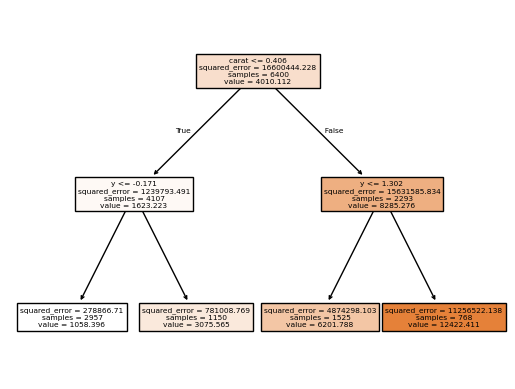

Depth of the tree: 2
Number of nodes: 7


In [38]:
from sklearn import tree

plt.figure()
tree.plot_tree(decision_tree = dt2,
               feature_names=['carat','cut','color','clarity', 'depth', 'table', 'x','y','z'], 
               class_names=['price'], 
               filled=True)
plt.savefig('tree.pdf')
plt.show()

print("Depth of the tree:", dt2.get_depth())
print("Number of nodes:", dt2.tree_.node_count)



In [28]:

'''
plt.figure()
tree.plot_tree(decision_tree = dt,
               feature_names=['carat','cut','color','clarity', 'depth', 'table', 'x','y','z'], 
               class_names=['price'], 
               filled=True)
plt.savefig('tree.pdf')
plt.show()
'''

"\nplt.figure()\ntree.plot_tree(decision_tree = dt,\n               feature_names=['carat','cut','color','clarity', 'depth', 'table', 'x','y','z'], \n               class_names=['price'], \n               filled=True)\nplt.savefig('tree.pdf')\nplt.show()\n"

## TO DO -- ANSWER THE FOLLOWING

Answer the following question (max 500 characters):

Based on the 1 - coefficient of determination $(R^2)$ values on training and test set and based on the max_depth/node_count, what conclusions could you draw regarding this new trained model?

In [39]:
print("\nANSWER")

# -- the following is a string with you answer
# -- TO DO
motivation = '''\nThe model shows underfitting: We got similar training error (1- R^2) compare to test error (1- R^2) but both values are quiet high.
The tree's depth (2) and node count (7) indicate low complexity, we are learning a model too simple.
'''

motivation = '''\nThe model exhibits signs of underfitting: The training error (1 - R^2) is similar to the test error (1 - R^2), but both values are relatively high.
The tree's depth (2) and the number of nodes (7) suggest low complexity, indicating that we are fitting a model that is too simple.'''

print(motivation)


ANSWER

The model exhibits signs of underfitting: The training error (1 - R^2) is similar to the test error (1 - R^2), but both values are relatively high.
The tree's depth (2) and the number of nodes (7) suggest low complexity, indicating that we are fitting a model that is too simple.


## TO DO -- DECISION TREE WITH CROSS-VALIDATION FOR max_depth TUNING

Perform $k$-fold cross validation (with $k$ = 5) with respect to the parameter $\texttt{max\_depth}$, with $\texttt{max\_depth}$ ranging from 1 to 30 included.

**Note**: consider only **integer** values for $\texttt{max\_depth}$!

At the end, note that you need to store in $\texttt{max\_depth\_opt}$ the best value for $\texttt{max\_depth}$ you found with the cross-validation procedure.

In [30]:
from sklearn.model_selection import KFold

# -- define the grid for the max_depth hyperparameter

max_depth_grid = [i for i in range(1, 31)] #List comprehension

# -- initialize the vector for the errors (1 - R^2)

err_train_kfold = np.zeros(len(max_depth_grid))
err_val_kfold = np.zeros(len(max_depth_grid))

# -- perform kfold cross validation for model selection (k = 5)

kf = KFold(n_splits = 5) # Create an object Kfold that will be useful after for doing the k-5 cross validation approach (using .split())

for i,params in enumerate(max_depth_grid):

    dt = DecisionTreeRegressor(max_depth = params, random_state= numero_di_matricola)

    for train_index, val_index in kf.split(X_train_scaled):

        X_train_kfold, X_val_kfold = X_train_scaled[train_index], X_train_scaled[val_index]
        Y_train_kfold, Y_val_kfold = Y_train[train_index], Y_train[val_index]

        scalerKF = StandardScaler()
        scalerKF.fit(X_train_kfold)
        X_train_kfold_scaled = scalerKF.transform(X_train_kfold)
        X_val_kfold_scaled = scalerKF.transform(X_val_kfold) 

        dt.fit(X_train_kfold_scaled, Y_train_kfold)

        err_train_kfold[i] += (1.0 - dt.score(X_train_kfold_scaled,Y_train_kfold))
        err_val_kfold[i] += (1.0 - dt.score(X_val_kfold_scaled, Y_val_kfold))

    err_train_kfold[i] /= 5 
    err_val_kfold[i] /= 5


# -- choose the regularization parameter that minimizes the loss

max_depth_opt = max_depth_grid[np.argmin(err_val_kfold)]
print('Best value of the max_depth parameter:', max_depth_opt)
print('Min. validation error (1 - R²) ', np.min(err_val_kfold))

Best value of the max_depth parameter: 8
Min. validation error (1 - R²)  0.04194665037814582


Plot validation and test error (1 - $R^2$) for different values of $\texttt{max\_depth}$.

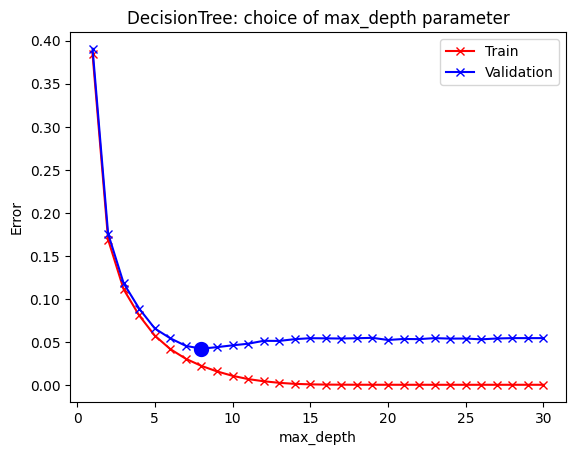

In [31]:
# -- plot the training error
plt.plot(max_depth_grid, 
         err_train_kfold, 
         color='r', 
         marker='x')

# -- plot the validation error
plt.plot(max_depth_grid, 
         err_val_kfold, 
         color='b', 
         marker='x')

# -- highlight min loss
plt.scatter(max_depth_opt, 
            np.min(err_val_kfold), 
            color='b', 
            marker='o', 
            linewidths=5)

plt.legend(['Train', 'Validation'])
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.title('DecisionTree: choice of max_depth parameter')
plt.savefig('train_val_loss.pdf')
plt.show()

Learn the final model using the optimal _max_depth_ obtained above and print the error (1 - R²) of the model on both the training and test data.

In [32]:

dt_final = DecisionTreeRegressor(max_depth = max_depth_opt, random_state= numero_di_matricola)

dt_final.fit(X_train_scaled, Y_train)

training_score = dt_final.score(X_train_scaled, Y_train)
test_score = dt_final.score(X_test_scaled, Y_test)

print("1 - coefficient of determination on training data:", 1 - training_score)
print("1 - coefficient of determination on test data:", 1 - test_score)

1 - coefficient of determination on training data: 0.02323820108926833
1 - coefficient of determination on test data: 0.037366882320266415


## TO DO -- FEATURE IMPORTANCE

Inspect the importance of each feature for the best decision tree obtained using the property $\texttt{feature\_importances\_}$ of $\texttt{DecisionTreeRegressor}$ class. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [33]:
print(dt_final.feature_importances_)

[6.39294581e-01 6.07528565e-04 2.77177538e-02 6.63421050e-02
 1.04023838e-03 2.38022758e-04 5.88693563e-03 2.56914975e-01
 1.95785963e-03]


Print the names of the three most importante features. To do this:
1. Get the indexes of the top-3 features according to their importance;
2. Print the name of each of the top-3 feature using the format "feature_name feature_index" (e.g., "depth 4").

In [34]:
# -- get the indexes of the top-3 features

# Dictionary of the features with the related importances
feature_importances = dt_final.feature_importances_

feature_dict = {name: importance for name, importance in zip(features_names, feature_importances)}

# Sort from the high to the lowest the features in order of importance and get the original indces
sorted_indices = sorted(range(len(feature_importances)), key=lambda i: feature_importances[i], reverse=True)

# Takes the first 3 indices
top_3_indices = sorted_indices[:3]

# -- print the name of each of the top-3 features
for idx in top_3_indices:
    print(f"{features_names[idx]}: {idx}")


carat: 0
y: 7
clarity: 3


# TO DO -- ANSWER THE FOLLOWING

Answer the following question (max 500 characters):

What are some advantages of using a Decision Tree with respect to a Deep Neural Network?

In [44]:
print("\nANSWER")

# -- the following is a string with you answer
motivation = '''A Decision Tree can offers several advantages over a Deep Neural Network (DNN):
 - First, it is easier to interpret, providing clear decision rules that are human-readable;
 - It requires less computational power for training and inference, especially for smaller datasets;
 - It is less tense to overfitting when properly pruned; 
DNNs, in contrast, are more complex, often incomprehensible to humans and require larger datasets and more computational resources.'''
print(motivation)

print(len(motivation))


ANSWER
A Decision Tree can offers several advantages over a Deep Neural Network (DNN):
 - First of all, it is easier to interpret, providing clear decision rules that are human-readable;
 - It requires less computational power for training and inference, especially for smaller datasets;
 - It is less tense to overfitting when properly pruned; 
DNNs, in contrast, are more complex, are often incomprehensible to humans and require larger datasets and more computational resources.
474


# TO DO -- COMPARISON WITH LINEAR REGRESSION

Train a Linear Regression model and compare it with the best decision tree obtained above.

In [36]:
from sklearn.linear_model import LinearRegression

# -- TO DO
model_linear = LinearRegression()

model_linear.fit(X_train_scaled,Y_train)

print("Linear Regression training error:", 1 - model_linear.score(X_train_scaled,Y_train))
print("Linear Regression test error:",  1 - model_linear.score(X_test_scaled,Y_test))
print("Decision Tree training error:", 1 - training_score )
print("Decision Tree test error:", 1- test_score)

Linear Regression training error: 0.08889258946982348
Linear Regression test error: 0.08260658580638391
Decision Tree training error: 0.02323820108926833
Decision Tree test error: 0.037366882320266415


# ABOUT TREES ...

In [37]:
import random

def christmas_tree():
    
    tree_height = 16
    
    print("\n\n🎄 Merry Christmas! 🎄\n\n".center(40))
          
    for i in range(tree_height):
    
        spaces = " " * (tree_height - i - 1)
        
        if i == 0:
            layer_content = "⭐"
        else:
            contents = [ "🍃", "🟡", "🔴", "🔵"]
            content = random.choices(contents, weights = [0.7, 0.1, 0.1, 0.1], k = 2 * i + 1)
            delimiter = ""
            layer_content = delimiter.join(content)
            
        print((spaces + layer_content).center(40))
            
    trunk = " " * (tree_height - 1) + "🟫"
    print(trunk.center(40))

christmas_tree()

        

🎄 Merry Christmas! 🎄

        
                           ⭐            
                         🍃🍃🍃            
                        🍃🔴🍃🍃🍃           
                      🍃🟡🔴🍃🍃🔴🍃           
                     🍃🍃🍃🍃🍃🍃🟡🍃🍃          
                   🍃🔵🟡🍃🍃🔵🍃🔵🍃🔴🍃          
                  🔴🍃🍃🍃🍃🍃🍃🟡🔵🔵🍃🔵🍃         
                🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🔵🔵🍃🍃         
               🍃🔴🟡🟡🟡🍃🍃🍃🍃🍃🟡🔴🍃🍃🍃🍃🟡        
             🍃🍃🍃🔵🔵🍃🍃🍃🟡🍃🔴🔴🍃🟡🟡🍃🍃🔴🍃        
            🍃🍃🍃🍃🍃🍃🍃🔵🍃🍃🔴🍃🍃🟡🍃🍃🍃🍃🍃🍃🍃       
          🍃🍃🍃🔵🍃🍃🟡🔴🔴🟡🍃🍃🍃🟡🍃🟡🍃🍃🍃🟡🟡🍃🍃       
         🍃🍃🍃🍃🍃🍃🍃🍃🔴🟡🍃🔴🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃      
       🔵🔴🔵🍃🍃🍃🍃🍃🍃🍃🟡🍃🔴🍃🍃🔵🍃🍃🔵🍃🍃🍃🍃🍃🔴🍃🍃      
      🔵🍃🍃🔴🟡🔵🔵🍃🍃🍃🍃🍃🍃🔵🍃🍃🍃🍃🍃🍃🍃🔴🔴🍃🍃🍃🔴🔴🍃     
    🍃🍃🟡🔴🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🍃🔵🍃🍃🔴🍃🔴🍃🟡🔴🍃🟡🍃🍃🍃     
                           🟫            
